
# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset**: In this analysis I choose 'No-show appointments' from data set option that udacity gave. **note: in no-show (no means show up) (yes means did not show up)**


> dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment, gender and disease.

> I have many questions about the dataset I want to know :

> first: Waht is the rate of female and male?

> second:  what is the rate of female and age?

> third: what is the average age who show up?





In [28]:
#packeges that I need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> our dataset contains 110527 rows and 14 columns.

> change some columns to appropriate type.

>I drop columns that we don't need them in our analysis 'PatientId','AppointmentID','Age','ScheduledDay','Neighbourhood','AppointmentDay'

> there is no missing values in the dataset so we don't need to drop any observations.

> there is incorrect data in age and we dropped it.



### General Properties

In [2]:
# load data
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# lets check the shape
df.shape

(110527, 14)

In [4]:
# a quick view for the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# I do this step to improve my skills and apply what I learned from my classroom !
df['AppointmentDay'] =  pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%d')
df['ScheduledDay'] =  pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%d')


# Confirm the date column is in datetime format
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB
None


In [7]:
# we will drop columns that we don't intresed in our analysis
df.drop(['PatientId','AppointmentID','ScheduledDay','Neighbourhood','AppointmentDay'], axis=1 ,inplace=True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


> **In the steps below I want to check the dataset (missing values, uniqueness, incorrect data)and fix it if there**

In [8]:
# 1- missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
Gender          110527 non-null object
Age             110527 non-null int64
Scholarship     110527 non-null int64
Hipertension    110527 non-null int64
Diabetes        110527 non-null int64
Alcoholism      110527 non-null int64
Handcap         110527 non-null int64
SMS_received    110527 non-null int64
No-show         110527 non-null object
dtypes: int64(7), object(2)
memory usage: 7.6+ MB


In [9]:
# 2- uniqueness
df.nunique()

Gender            2
Age             104
Scholarship       2
Hipertension      2
Diabetes          2
Alcoholism        2
Handcap           5
SMS_received      2
No-show           2
dtype: int64

In [10]:
# 3- incorrect data
# check the max and min in age 
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

**We can notice there is -1 in age! witch is not reasonable! so I will remove it, for 115 it is make sence because there are people in the world their age more than 115 years**

In [11]:
#drop -1 and decribe to check the min
df = df[df.Age != -1]
df.Age.describe()        

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Source: https://hackersandslackers.com/pandas-dataframe-drop/ 

<a id='eda'></a>
## Exploratory Data Analysis

> **As what we mentioned early, we have 3 questions.**


### Research Question 1 (Waht is the rate of female and male?)


We can notice that female are more than  male


Text(0, 0.5, 'Count')

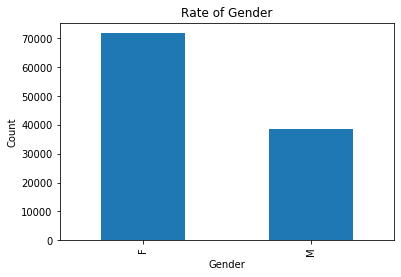

In [12]:
df['Gender'].value_counts().plot(kind = 'bar')
plt.title('Rate of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

### Research Question 2  ( what is the rate of female and age?)

the average age for female is between (25,60) years 

In [30]:
df_f = df.query('Gender =="F"')
df_f.head()


,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No
5,F,76,0,1,0,0,0,0,No


Text(0, 0.5, 'Count')

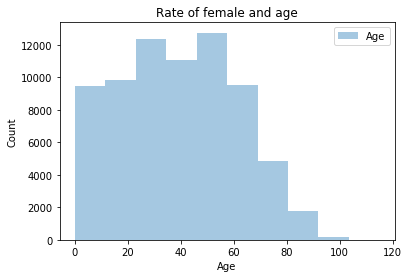

In [17]:
df_f[["Gender", "Age"]].plot.hist(alpha=0.4)
plt.title('Rate of female and age')
plt.xlabel('Age')
plt.ylabel('Count')

### Research Question 3  (what is the average age who show up?)

average age for patient show up 38 years while who didn't show up is 34 year maybe we can say older patient care about coming to clinic more than younger patient.

In [21]:
df.groupby(['No-show']).Age.mean()

No-show
No     37.790504
Yes    34.317667
Name: Age, dtype: float64

# correlation matrix 
we will use it for our Conclusions

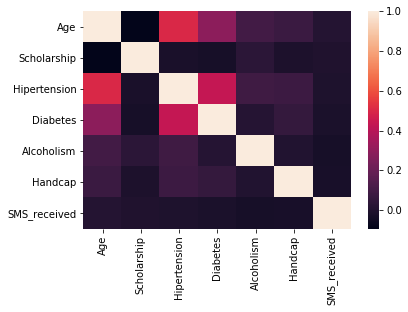

In [29]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr)


source: https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas


## Conclusions

based on the data, a few observations can be made:
 >1- the number of female is greater than the number of male.
 >>2- there is a strong relationship between age and hipertension .
 >>>3- SMS has no effect on any variable.
 >>>>4- there is a risk if you have diabetes to get hipertension .

 

**Limitations and missing information**
 >1- if we have a column for if the clinic in the same area for the patient or not it will help us to find if there is a relation if clinic is near for patient or no regarding to show up.
>> 2- price of scholarship would be a good indecator to look at.
 >>>3- level education would be interesting metric to look at.
 >>>>4- column for available transportation would be help to measure the show up.

 
